<a href="https://colab.research.google.com/github/JuanFdoGf/PracticasDS/blob/main/Clasificaci%C3%B3n_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from html.parser import HTMLParser
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import os
import re
import pandas as pd
import kagglehub
import string
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

##1. Lectura del conjunto de datos

In [2]:
path = kagglehub.dataset_download("jedhelmers/disaster-tweets")

print("Path to dataset files:", path)


Path to dataset files: /root/.cache/kagglehub/datasets/jedhelmers/disaster-tweets/versions/1


In [3]:
train_path = os.path.join(path, 'resources', 'train.csv')
test_path = os.path.join(path, 'resources', 'test.csv')

X_train = pd.read_csv(train_path)
X_test = pd.read_csv(test_path)

In [4]:
X_train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [5]:
X_test

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


##2. Visualización del conjunto de datos

In [6]:
 print('Tamaño del conjunto de datos de entrenamiento: ', len(X_train))
 print('Tamaño del conjunto de datos de pruebas: ', len(X_test))

Tamaño del conjunto de datos de entrenamiento:  7613
Tamaño del conjunto de datos de pruebas:  3263


In [7]:
# Tweets de cada tipo que se encuentran en el conjunto de datos de entrenamiento
X_train['target'].value_counts()

,count
target,
0,4342
1,3271


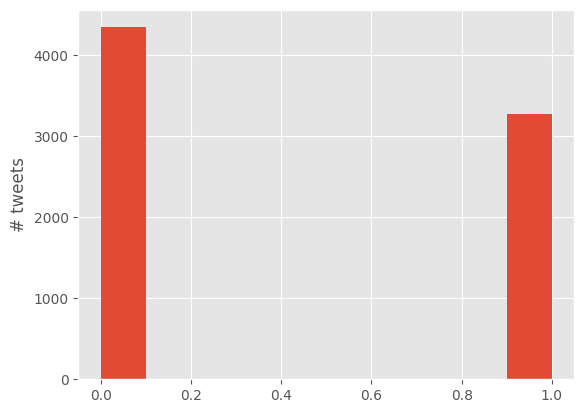

In [8]:
X_train['target'].hist()
plt.ylabel('# tweets')
plt.show()

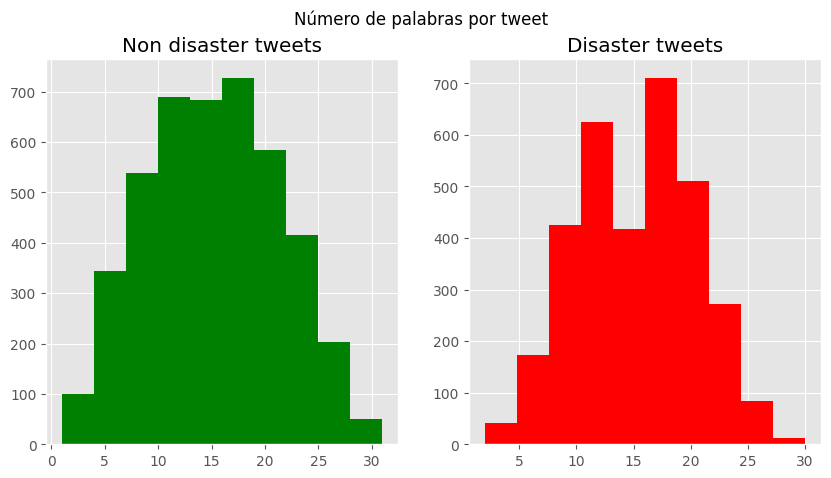

In [9]:
# Número de palabras por Tweet
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Calculamos el número de palabras por tweet
tweet_len_0 = X_train[X_train['target'] == 0]['text'].str.split().map(lambda x: len(x))
tweet_len_1 = X_train[X_train['target'] == 1]['text'].str.split().map(lambda x: len(x))

ax1.hist(tweet_len_0, color='green')
ax1.set_title('Non disaster tweets')

ax2.hist(tweet_len_1, color='red')
ax2.set_title('Disaster tweets')

fig.suptitle('Número de palabras por tweet')

plt.show()

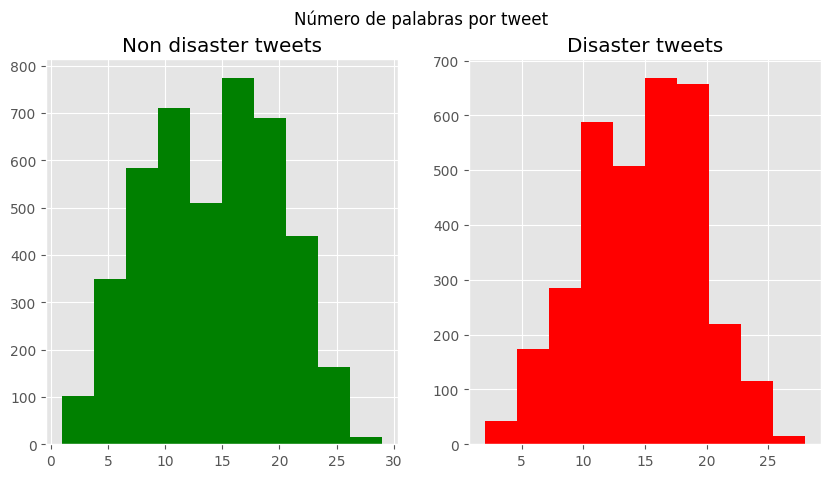

In [10]:
# Número de palabras únicas por tweet
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Calculamos el número de palabras
tween_len_0 = X_train[X_train['target'] == 0]['text'].str.split().map(lambda x: len(set(x)))
tweet_len_1 = X_train[X_train['target'] == 1]['text'].str.split().map(lambda x: len(set(x)))

ax1.hist(tween_len_0, color='green')
ax1.set_title('Non disaster tweets')

ax2.hist(tweet_len_1, color='red')
ax2.set_title('Disaster tweets')

fig.suptitle('Número de palabras por tweet')

plt.show()

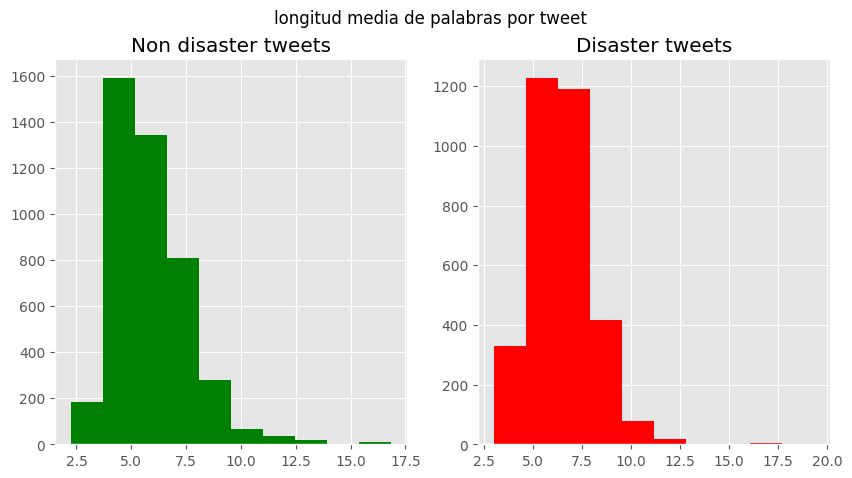

In [11]:
# Longitud media de las palabras por tweet
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Calculamos la longitud media de las palabras por tweet
tweet_len_0 = X_train[X_train['target'] == 0]['text'].str.split().map(lambda x: np.mean([len(i) for i in x]))
tweet_len_1 = X_train[X_train['target'] == 1]['text'].str.split().map(lambda x: np.mean([len(i) for i in x]))

ax1.hist(tweet_len_0, color='green')
ax1.set_title('Non disaster tweets')

ax2.hist(tweet_len_1, color='red')
ax2.set_title('Disaster tweets')

fig.suptitle('longitud media de palabras por tweet')

plt.show()

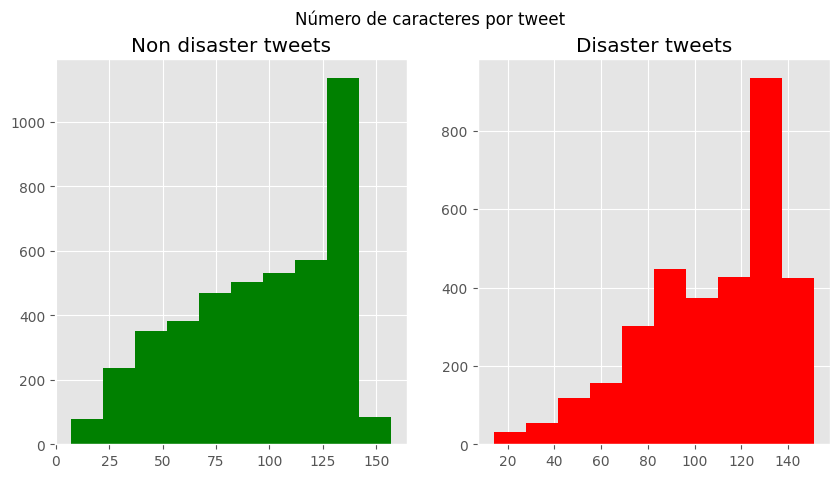

In [12]:
# Número de caracteres por tweet
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Calculamos el número de caracteres por tweet
tweet_len_0 = X_train[X_train['target'] == 0]['text'].str.len()
tweet_len_1 = X_train[X_train['target'] == 1]['text'].str.len()

ax1.hist(tweet_len_0, color='green')
ax1.set_title('Non disaster tweets')

ax2.hist(tweet_len_1, color='red')
ax2.set_title('Disaster tweets')

fig.suptitle('Número de caracteres por tweet')

plt.show()

In [13]:

from nltk.corpus import stopwords

In [14]:
def plot_stopwords(label):
    tweets_stopwords = {}
    for words in X_train[X_train['target'] == label]['text'].str.split():
        sw = list(set(words).intersection(stopwords.words('english')))
        for w in sw:
            if w in tweets_stopwords.keys():
                tweets_stopwords[w] += 1
            else:
                tweets_stopwords[w] = 1

    top = sorted(tweets_stopwords.items(), key=lambda x:x[1], reverse=True)[:10]
    words, counts = zip(*top)


    plt.bar(words, counts, color='red')
    plt.show()

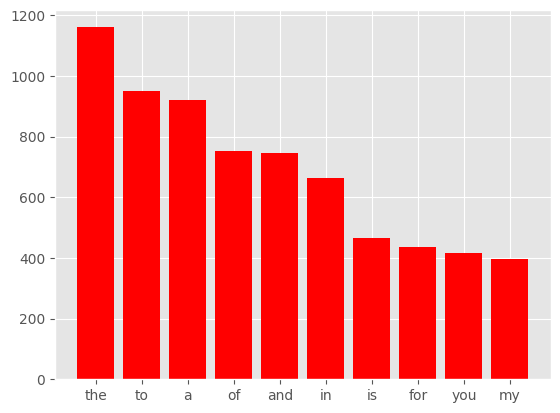

In [15]:
plot_stopwords(0)

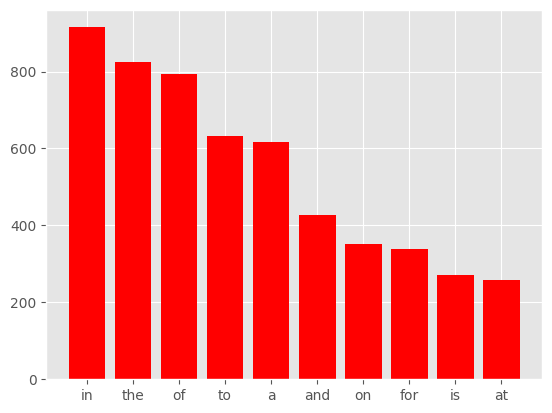

In [16]:
plot_stopwords(1)

In [17]:
# Análisis signos de puntuación
def plot_punctuation(label):
    tweets_punctuation = {}
    for words in X_train[X_train['target'] == label]['text'].str.split():
        sw = list(set(words).intersection(string.punctuation))
        for w in sw:
            if w in tweets_punctuation.keys():
                tweets_punctuation[w] += 1
            else:
                tweets_punctuation[w] = 1
    top = sorted(tweets_punctuation.items(), key=lambda x:x[1], reverse=True)[:20]
    words, counts = zip(*top)
    plt.bar(words, counts, color='red')
    plt.show()

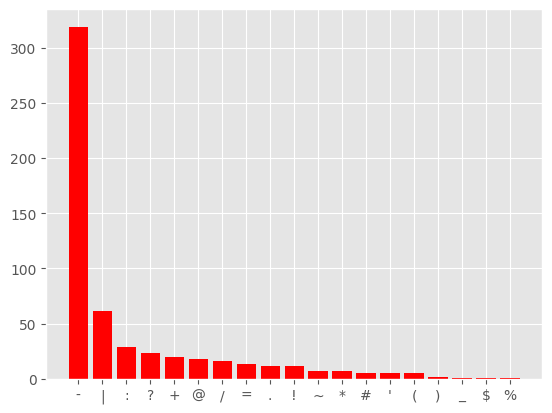

In [18]:
plot_punctuation(0)

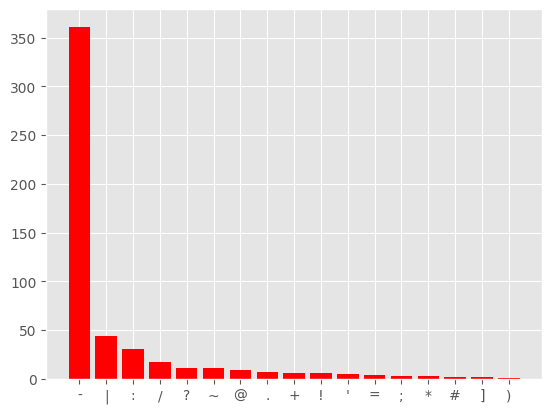

In [19]:
plot_punctuation(1)

In [20]:
# Análisis de Ngramas
cv = CountVectorizer(ngram_range=(2, 2))
sum_words = cv.fit_transform(X_train['text']).sum(axis=0)

# Calculamos
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)[:20]

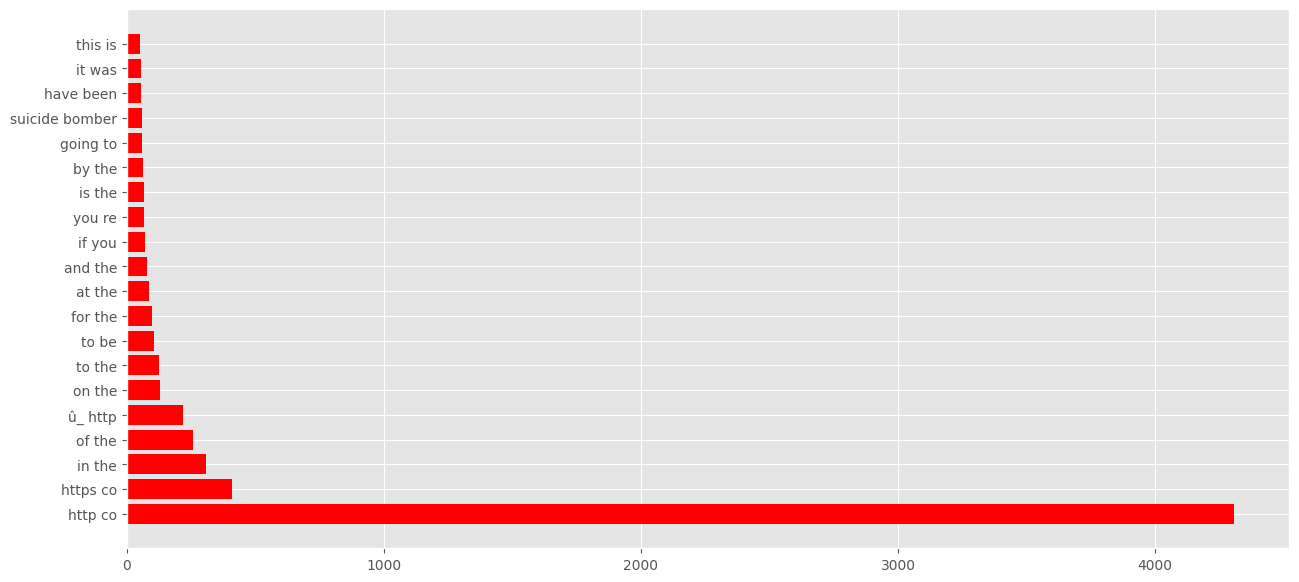

In [21]:
plt.figure(figsize=(15, 7))
words, counts = zip(*words_freq)
plt.barh(words, counts, color='red')
plt.show()

##3. Limpieza del conjunto de datos

In [22]:
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)

In [23]:
class HTMLStripper(HTMLParser):
    def __init__(self):
        self.reset()
        self.strict = False
        self.convert_charrefs = True
        self.fed = []

    def handle_data(self, d):
        self.fed.append(d)

    def get_data(self):
        return ''.join(self.fed)

def remove_html(text):
    s = HTMLStripper()
    s.feed(text)
    return s.get_data()

In [24]:
def remove_emoji(text):
    emoji_pattern = re.compile('['
                           u'\U0001F600-\U0001F64F'      # emoticons
                           u'\U0001F300-\U0001F5FF'      # symbols & pictographs
                           u'\U0001F680-\U0001F6FF'      # transport & map symbols
                           u'\U0001F1E0-\U0001F1FF'      # flags (iOS)
                           u'\U00002702-\U000027B0'
                           u'\U000024C2-\U0001F251'
                           ']+', flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [25]:
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

In [26]:
# Aplicamos las funciones de limpieza del conjunto de datos
X_train_prep = X_train.copy()

X_train_prep['text'] = X_train_prep['text'].apply(remove_url)
X_train_prep['text'] = X_train_prep['text'].apply(remove_html)
X_train_prep['text'] = X_train_prep['text'].apply(remove_emoji)
X_train_prep['text'] = X_train_prep['text'].apply(remove_punctuation)

In [27]:
# Aplicamos las funciones de limpieza del conjunto de datos
X_test_prep = X_test.copy()

X_test_prep['text'] = X_test_prep['text'].apply(remove_url)
X_test_prep['text'] = X_test_prep['text'].apply(remove_html)
X_test_prep['text'] = X_test_prep['text'].apply(remove_emoji)
X_test_prep['text'] = X_test_prep['text'].apply(remove_punctuation)

##4. Vectorización del conjunto de datos

In [28]:
Y_train = X_train_prep['target']

In [29]:
vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train_prep['text'])

In [30]:
X_train = X_train.toarray()

In [31]:
X_test = vectorizer.transform(X_test_prep['text'])
X_test = X_test.toarray()

##5. División del conjunto de datos

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.15)

In [33]:
print('Longitud subconjunto de entrenamiento: ', len(X_train))
print('Longitud subconjunto de validación: ', len(X_val))
print('Longitud subconjunto de pruebas: ', len(X_test))

Longitud subconjunto de entrenamiento:  6471
Longitud subconjunto de validación:  1142
Longitud subconjunto de pruebas:  3263


##6. Construcción del modelo

In [34]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import Input

model = models.Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(1, activation='sigmoid'))

In [35]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', 'Precision']
)

In [36]:
history = model.fit(
    X_train,
    Y_train,
    epochs=20,
    batch_size=1024,
    validation_data=(X_val, Y_val))

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 176ms/step - Precision: 0.4729 - accuracy: 0.5595 - loss: 0.6909 - val_Precision: 0.0000e+00 - val_accuracy: 0.5911 - val_loss: 0.6844
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - Precision: 0.9708 - accuracy: 0.5745 - loss: 0.6818 - val_Precision: 1.0000 - val_accuracy: 0.5928 - val_loss: 0.6736
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - Precision: 0.9607 - accuracy: 0.5830 - loss: 0.6703 - val_Precision: 1.0000 - val_accuracy: 0.6130 - val_loss: 0.6608
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - Precision: 0.9464 - accuracy: 0.6117 - loss: 0.6549 - val_Precision: 1.0000 - val_accuracy: 0.6471 - val_loss: 0.6465
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - Precision: 0.9772 - accuracy: 0.6368 - loss: 0.6386 - val_Precision: 1.0000 - val_accuracy: 0.6786 - val_loss: 0.6314
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step - Precision: 0.9653 - accuracy: 0.6761 - loss: 0.6166 - val_Precision: 0.9847 - val_accuracy: 0.

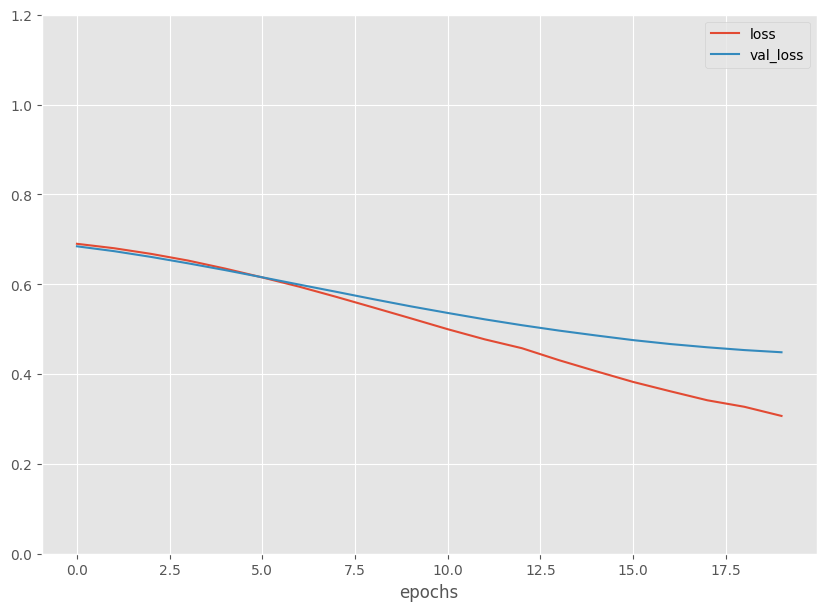

In [37]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot(figsize=(10, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1.2)
plt.xlabel('epochs')
plt.show()

##7. Evaluación del modelo

In [38]:
Y_pred = model.predict(X_test).round(0)
Y_pred

102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[1.],
       [0.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [39]:
for i in range(30):
    print('{} - {}'.format(X_test_prep['text'][i], Y_pred[i]))

Just happened a terrible car crash - [1.]
Heard about earthquake is different cities stay safe everyone - [0.]
there is a forest fire at spot pond geese are fleeing across the street I cannot save them all - [1.]
Apocalypse lighting Spokane wildfires - [1.]
Typhoon Soudelor kills 28 in China and Taiwan - [1.]
Were shakingIts an earthquake - [1.]
Theyd probably still show more life than Arsenal did yesterday eh EH - [0.]
Hey How are you - [0.]
What a nice hat - [0.]
Fuck off - [0.]
No I dont like cold - [0.]
NOOOOOOOOO Dont do that - [0.]
No dont tell me that - [0.]
What if - [0.]
Awesome - [0.]
Birmingham Wholesale Market is ablaze BBC News  Fire breaks out at Birminghams Wholesale Market  - [1.]
sunkxssedharry will you wear shorts for race ablaze  - [0.]
PreviouslyOnDoyinTv Toke MakinwaÛªs marriage crisis sets Nigerian Twitter ablaze  - [1.]
Check these out     nsfw - [0.]
PSA IÛªm splitting my personalities

 techies follow ablazeco
 Burners follow ablaze - [0.]
beware world ablaze